# Multiple Linear Regression Model
A linear regression model that contains more than one predictor variable is called a multiple linear regression model. The following model is a multiple linear regression model with two predictor variables, ***$X_1$*** and ***$X_2$***.
then

**$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon$**

#### For more description [Click Here](http://reliawiki.org/index.php/Multiple_Linear_Regression_Analysis)

## [Datasets Link](tiny.cc/apssdc-datasets)

In [1]:
import pandas as pd

In [2]:
fuel = pd.read_csv('FuelConsumptionCo2.csv')
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
fuel.shape

(1067, 13)

In [4]:
fuel.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [5]:
len(fuel['MAKE'].value_counts())

39

In [6]:
fuel['MAKE'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
TOYOTA           49
AUDI             49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [7]:
features = fuel[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [8]:
import seaborn as sns

sns.pairplot(data = features)

In [9]:
X = features[['ENGINESIZE','FUELCONSUMPTION_COMB']]
Y = features[['CO2EMISSIONS']]

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression() # Regression Object
pred = reg.fit(X,Y)
Y_pred = reg.predict(X)

In [12]:
reg.score(X,Y)

0.8582144778981454

In [13]:
reg.predict([[2.0,8.5]])

array([[200.00402631]])

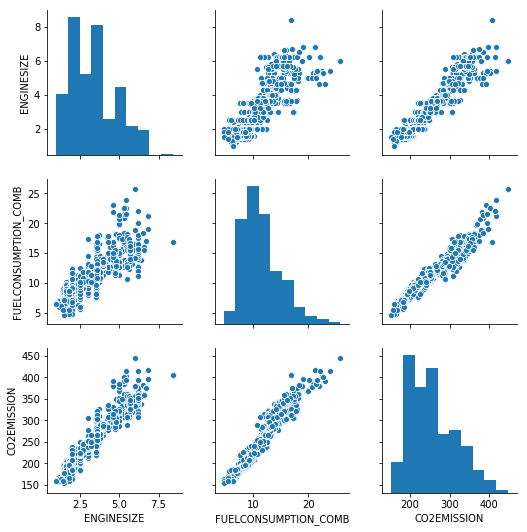

In [14]:
df = pd.DataFrame(X)
df['CO2EMISSION'] = pd.DataFrame(Y_pred)
sns.pairplot(df)

In [15]:
reg.coef_

array([[19.49628353,  9.72995852]])

In [16]:
reg.intercept_

array([78.30681186])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 7)

In [19]:
reg1 = LinearRegression()

reg1.fit(X_train,Y_train)

Y_pred = reg1.predict(X_test)

reg1.score(X_test,Y_test)

0.8721283450220715

In [20]:
Y_pred = reg1.predict(X_test)

In [21]:
reg1.score(X_test,Y_test)

0.8721283450220715